## Project 1 for PHSX 815

In [28]:
#Question 1
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [29]:
x0 = 0                    #initial condition
xf = 20                    #initial condition
n  = 10000        #interval values: 1, 10, 100, 1000, 10000
y0 = 0                    #initial value
a = -52.419               #coefficients
b = 58.252
c = 150.39
Vg = 40.0


In [37]:
#with Rescaling
def f(x,y):
    return (Vg - ((2*a*x)+(4*b*x**3)+(6*c*x**5)))/a

def Runge_Kutta(f, x0, xf, n, y0):
    RKx = np.zeros(n)
    RKy = np.zeros(n)

    #h = (xf - x0) / n
    h = 0.00005
    x = x0
    y = y0

    RKx[0] = x
    RKy[0] = y

    for i in range(0, n):
        k1 = h * f(x, y)
        k2 = h * f(x + h / 2, y + k1 / 2)
        k3 = h * f(x + h / 2, y + k2 / 2)
        k4 = h * f(x + h, y + k3)

        x = x0 + (i + 1) * h
        y += (k1 + 2 * k2 + 2 * k3 + k4) / 6

        RKx[i] = x
        RKy[i] = y

    #return [RKx, RKy]
    plt.plot(RKx,RKy)
    plt.xlabel('t')
    plt.ylabel('Q')
    

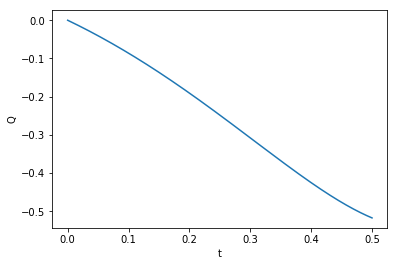

In [38]:
Runge_Kutta(f, x0, xf, n, y0)
plt.show()

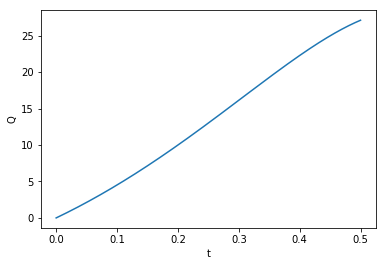

In [40]:
#No rescaling
def f(x,y):
    return (Vg - ((2*a*x)+(4*b*x**3)+(6*c*x**5)))

def Runge_Kutta_orig(f, x0, xf, n, y0):
    RKx = np.zeros(n)
    RKy = np.zeros(n)

    #h = (xf - x0) / n
    h = 0.00005
    x = x0
    y = y0

    RKx[0] = x
    RKy[0] = y

    for i in range(0, n):
        k1 = h * f(x, y)
        k2 = h * f(x + h / 2, y + k1 / 2)
        k3 = h * f(x + h / 2, y + k2 / 2)
        k4 = h * f(x + h, y + k3)

        x = x0 + (i + 1) * h
        y += (k1 + 2 * k2 + 2 * k3 + k4) / 6

        RKx[i] = x
        RKy[i] = y

    #return [RKx, RKy]
    plt.plot(RKx,RKy)
    plt.xlabel('t')
    plt.ylabel('Q')
    
Runge_Kutta_orig(f, x0, xf, n, y0)
plt.show()

 0.0    1.00000  +0.0000e+00
 1.0    3.21723  +1.6547e+00
 2.0  196.87027  +1.9287e+02
 3.0 2171.22392  +2.1607e+03
 4.0 12017.85034  +1.1993e+04
 5.0 45494.82518  +4.5442e+04
 6.0 135256.60228  +1.3516e+05
 7.0 340149.56680  +3.3997e+05
 8.0 756573.26686  +7.5628e+05
 9.0 1531907.32357  +1.5315e+06
10.0 2880004.01967  +2.8793e+06


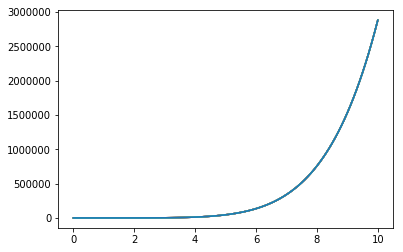

In [34]:
def rk4(f, x0, y0, x1, n):
    vx = [0] * (n + 1)
    vy = [0] * (n + 1)
    h = (x1 - x0) / float(n)
    vx[0] = x = x0
    vy[0] = y = y0
    for i in range(1, n + 1):
        k1 = h * f(x, y)
        k2 = h * f(x + 0.5 * h, y + 0.5 * k1)
        k3 = h * f(x + 0.5 * h, y + 0.5 * k2)
        k4 = h * f(x + h, y + k3)
        vx[i] = x = x0 + i * h
        vy[i] = y = y + (k1 + k2 + k2 + k3 + k3 + k4) / 6
    return vx, vy
 
def f(x, y):
    return (Vg - ((2*a*x)+(4*b*x**3)+(6*c*x**5)))/a
 
vx, vy = rk4(f, 0, 1, 10, 100)
for x, y in list(zip(vx, vy))[::10]:
    print("%4.1f %10.5f %+12.4e" % (x, y, y - (4 + x * x)**2 / 16))
    
    plt.plot(vx,vy)
 